<a href="https://colab.research.google.com/github/oktsadwikar/DPDM2023/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPLICATION OF DBSCAN**

Using Aggregation Benchmark Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preprocessing**

In [2]:
import pandas as pd
import numpy as np

### Import the dataset

In [11]:
col_name = ['a1','a2']

In [12]:
data = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/Aggregation.csv',header = None,names=col_name)

In [13]:
data

,a1,a2
0,0.367470,0.981618
1,0.347892,0.941176
2,0.334337,0.970588
3,0.325301,0.987132
4,0.313253,0.959559
...,...,...
783,0.134036,0.051471
784,0.141566,0.029412
785,0.155120,0.047794
786,0.143072,0.058824


### Eyeball the data

In [14]:
data.shape

(788, 2)

### Descriptive statistics

In [15]:
data.describe()

,a1,a2
count,788.000000,788.000000
mean,0.488458,0.449330
std,0.298857,0.297415
min,0.000000,0.000000
25%,0.234940,0.187040
50%,0.448042,0.359375
75%,0.823795,0.735754
max,1.000000,1.000000


### Check Missing Value

In [16]:
data.isnull().any()

a1    False
a2    False
dtype: bool

### Plotting the data

In [10]:
import matplotlib.pyplot as plt

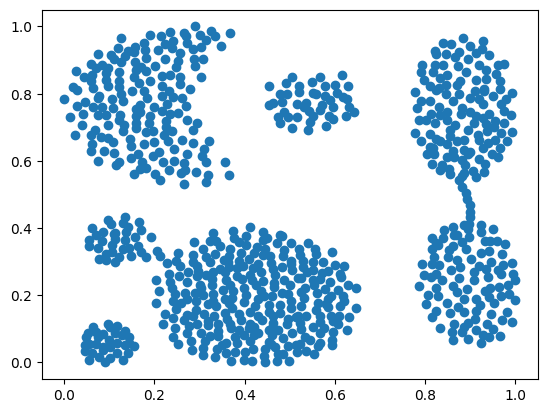

In [19]:
plt.scatter(data['a1'], data['a2'])

## DBSCAN

### Find suitable parameter Eps and MinPts

MinPts >= Dimensions + 1 or sometimes MinPts = 2*Dimensions

Eps -> To determine the optimal ε parameter, I will compute the k-nearest neighbor (kNN) distances (average distance of every data point to its k-nearest neighbors) of an input dataset using the k-nearest neighbor method (unsupervised nearest neighbors learning).

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(data)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

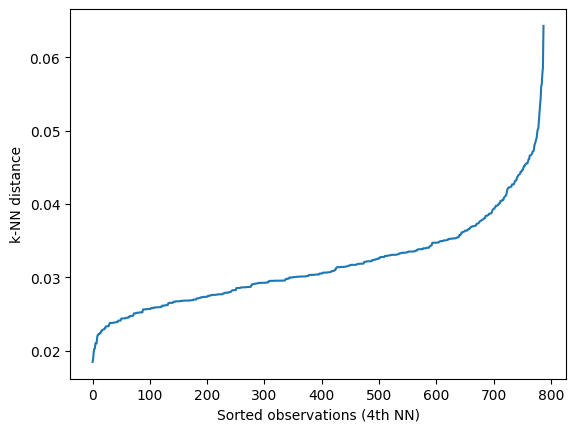

In [22]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [24]:
!pip install --upgrade kneed

In [29]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.04712544875174265


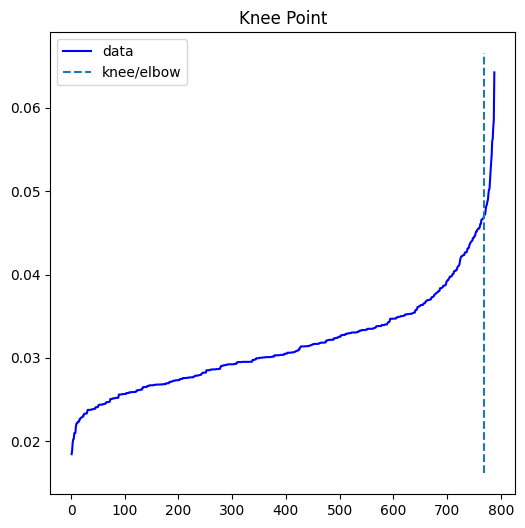

In [30]:
kneedle.plot_knee()
plt.show()

Then, we use eps = 0.04712544875174265 and MinPts = 4

### Compute DBSCAN Clustering

In [33]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 0.047, min_samples = 4).fit(data)
# get cluster labels
clusters.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [39]:
data['cluster']=clusters.labels_
data

,a1,a2,cluster
0,0.367470,0.981618,0
1,0.347892,0.941176,0
2,0.334337,0.970588,0
3,0.325301,0.987132,0
4,0.313253,0.959559,0
...,...,...,...
783,0.134036,0.051471,4
784,0.141566,0.029412,4
785,0.155120,0.047794,4
786,0.143072,0.058824,4


In [40]:
# check unique clusters
data['cluster'].value_counts()

 1    307
 2    232
 0    169
 3     45
 4     34
-1      1
Name: cluster, dtype: int64

### Visualization

In [42]:
import plotly.express as px

fig = px.scatter(data, x="a1", y="a2", color="cluster")

fig.show()

### silhouette score

In [45]:
from sklearn.metrics import silhouette_score as ss

x = data[['a1','a2']].to_numpy()
ss(x, data['cluster'])

0.28337466235437625